In [73]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
# pd.options.display.max_columns=30

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualización y Exploración del DataSet

Descripción de las variables:


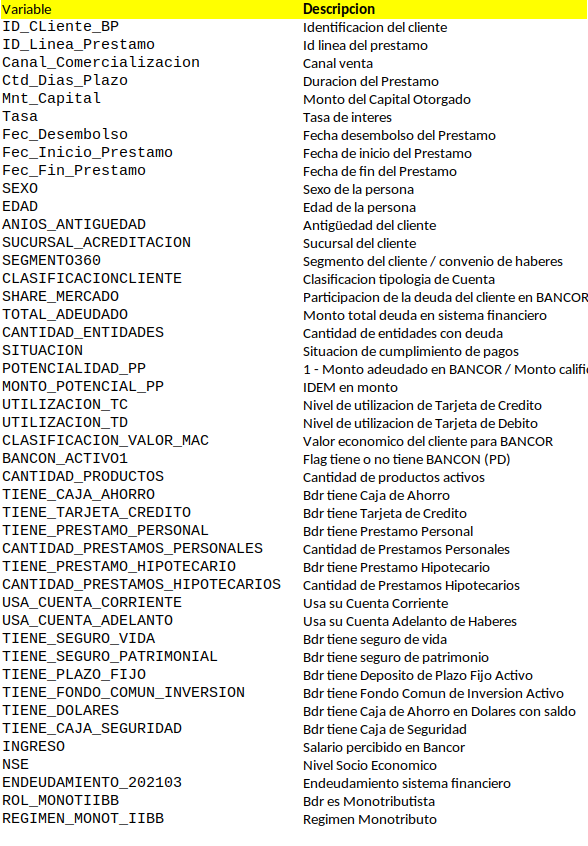

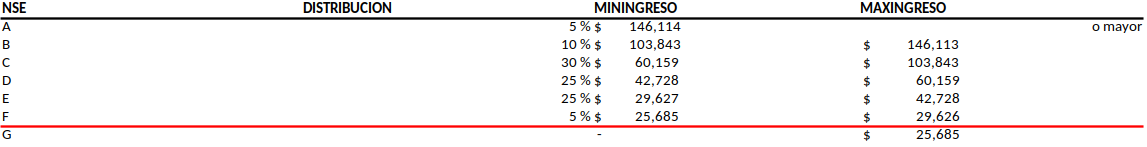

Importamos dataset y visualizamos algunos atributos del mismo

In [74]:
url = "https://raw.githubusercontent.com/bancords/challenge/main/dataset.csv"
df = (pd.read_csv(url)).drop_duplicates()

ID_clients = pd.unique(df['ID_CLiente_BP'])
print(f"La cantidad de clientes en el DataSet es {len(ID_clients)} y por cada uno de ellos se tienen {len(df.columns)-1} datos \n")

print('Una pequeña visualización del DataSet es la siguiente: \n')
df.head(5)


La cantidad de clientes en el DataSet es 127673 y por cada uno de ellos se tienen 44 datos 

Una pequeña visualización del DataSet es la siguiente: 



,ID_CLiente_BP,ID_Linea_Prestamo,Canal_Comercializacion,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,Fec_Desembolso,Fec_Inicio_Prestamo,Fec_Fin_Prestamo,SEXO,...,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
0,49950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,0,0,0,0,0,18410,G,0.59,sd,sd
1,49951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,0,0,0,1,0,50473,D,0.21,sd,sd
2,49965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,0,1,0,0,0,56184,D,0.00,sd,sd
3,49968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,0,0,0,0,0,44517,D,0.01,MONOTRIBUTO,D
4,49969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,...,0,0,0,0,0,37185,E,0.00,MONOTRIBUTO,C


## Empezamos a explorar el DataSet a partir del uso de algunas funciones de la libreria Pandas:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142469 entries, 0 to 142472
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID_CLiente_BP                    142469 non-null  int64  
 1   ID_Linea_Prestamo                62469 non-null   object 
 2   Canal_Comercializacion           62469 non-null   object 
 3   Ctd_Dias_Plazo                   62386 non-null   float64
 4   MNT_CAPITAL                      62469 non-null   float64
 5   Tasa                             62469 non-null   float64
 6   Fec_Desembolso                   62469 non-null   object 
 7   Fec_Inicio_Prestamo              62469 non-null   object 
 8   Fec_Fin_Prestamo                 62441 non-null   object 
 9   SEXO                             142469 non-null  object 
 10  EDAD                             142469 non-null  int64  
 11  ANIOS_ANTIGUEDAD                 142469 non-null  int64  
 12  SU

Se puede observar que hay 80.000 filas de nuestro DataSet con información nula en lo que respecta a prestamos (un poco más en la columna "Fecha finalización del préstamo".

Entonces tenemos que profundizar en la exploracion de los datos de nuestro DataSet.

In [76]:
df['Canal_Comercializacion'].value_counts()

Digital           33637
Sucursal          14509
ATM               13326
ComercioAliado      997
Name: Canal_Comercializacion, dtype: int64

In [77]:
df_por_clients = df.drop_duplicates(subset='ID_CLiente_BP')

print(sum(df['ID_Linea_Prestamo'].isnull()))
print(sum(df_por_clients['ID_Linea_Prestamo'].isnull()))
print(len(df_por_clients) - sum(df_por_clients['ID_Linea_Prestamo'].isnull()))

print('')

print(sum(df_por_clients['Fec_Inicio_Prestamo'].isnull()))
print(sum(df_por_clients['Fec_Desembolso'].isnull()))
print(sum(df_por_clients['CANTIDAD_PRESTAMOS_PERSONALES']==0))
print(sum(df_por_clients['TIENE_PRESTAMO_PERSONAL']==0))
print(sum(df_por_clients['Fec_Fin_Prestamo'].isnull()))

print('')

print(sum(df_por_clients['CANTIDAD_PRESTAMOS_HIPOTECARIOS']!=0))
print(sum(df_por_clients['TIENE_PRESTAMO_HIPOTECARIO']!=0))


80000
80000
47673

80000
80000
80667
80667
80017

231
231


In [78]:
if min(pd.to_datetime(df[df['Fec_Fin_Prestamo'].notnull()]['Fec_Fin_Prestamo'])) < pd.to_datetime('2022.03.01'):
    print('En el DS hay info sobre préstamos ya concluídos')
    n_prestamos_fin = sum(pd.to_datetime(df[df['Fec_Fin_Prestamo'].notnull()]['Fec_Fin_Prestamo']) < pd.to_datetime('2022.03.01'))
    print(f'{n_prestamos_fin} préstamos concluyeron el mes pasado')

En el DS hay info sobre préstamos ya concluídos
13328 préstamos concluyeron el mes pasado


In [79]:
print(f'La cantidad de items con info en nuestro DataSet es {len(df)} \n')

for tag in df.columns[1:]:
    n = len(df.drop_duplicates(subset=['ID_CLiente_BP', tag]))
    print(f'La cantidad de info no duplicada por: clientes junto a {tag} es {n}')

La cantidad de items con info en nuestro DataSet es 142469 

La cantidad de info no duplicada por: clientes junto a ID_Linea_Prestamo es 130905
La cantidad de info no duplicada por: clientes junto a Canal_Comercializacion es 129813
La cantidad de info no duplicada por: clientes junto a Ctd_Dias_Plazo es 133439
La cantidad de info no duplicada por: clientes junto a MNT_CAPITAL es 141183
La cantidad de info no duplicada por: clientes junto a Tasa es 138914
La cantidad de info no duplicada por: clientes junto a Fec_Desembolso es 142068
La cantidad de info no duplicada por: clientes junto a Fec_Inicio_Prestamo es 142068
La cantidad de info no duplicada por: clientes junto a Fec_Fin_Prestamo es 140287
La cantidad de info no duplicada por: clientes junto a SEXO es 127673
La cantidad de info no duplicada por: clientes junto a EDAD es 127673
La cantidad de info no duplicada por: clientes junto a ANIOS_ANTIGUEDAD es 127673
La cantidad de info no duplicada por: clientes junto a SUCURSAL_ACREDITA

De los datos observados anteriormente podemos concluir que el banco tiene 127.673 clientes de los cuales posee información. 

Además, en el DataSet se tiene anotado para todos aquellos clientes la fecha en que han pedido un prestamo. Observamos que hay 80.000 clientes que no tienen información con respecto a préstamos, por lo que podemos deducir que nunca han solicitado uno. De este dato se concluye también que 47.673 clientes han pedido un préstamo alguna vez, de los cuales 231 son Préstamos Hipotecarios.
(**)

## Ahora procedemos a trabajar con el tipo de objetos que encontramos en cada columna de nuestro DataSet:

Observamos que varias columnas correspondería convertirlas a string o Datetime. Además chequeamos que el forma de las variables categóricas se correspondan con su descripción.

In [80]:
df['Fec_Desembolso'].replace('01/01/9999', np.nan, inplace=True)
# to datetime:
df['Fec_Desembolso'] = pd.to_datetime(df['Fec_Desembolso'])
df['Fec_Inicio_Prestamo'] = pd.to_datetime(df['Fec_Inicio_Prestamo'])
df['Fec_Fin_Prestamo'] = pd.to_datetime(df['Fec_Fin_Prestamo'])

# categoric variables
set_sexo = set(df['SEXO'])
print(f'SEXO:{set_sexo}')
print(df['SEXO'].value_counts())
set_monot = set(df['ROL_MONOTIIBB'])
print(f'ROL_MONOTIIBB: {set_monot}')
set_reg_monot = set(df['REGIMEN_MONOT_IIBB'])
print(f'REGIMEN_MONOT_IIBB: {set_reg_monot}')
print('-----¿¿QUÉ REPRESENTAN ESTAS CATEGORÍAS??-- > ¿SEXO = H? --- \n')

df['NSE'].replace('sd', np.nan, inplace=True)
print(set(df['NSE']))
df['UTILIZACION_TC'] = df['UTILIZACION_TC'].str.lower().replace('sd', np.nan)
print(set(df['UTILIZACION_TC']))
df['UTILIZACION_TD'] = df['UTILIZACION_TD'].str.lower().replace('sd', np.nan)
print(set(df['UTILIZACION_TD']))
df['CLASIFICACION_VALOR_MAC'] = df['CLASIFICACION_VALOR_MAC'].str.lower()
print(set(df['CLASIFICACION_VALOR_MAC']))
print(set(df['CLASIFICACIONCLIENTE']))
print(set(df['SEGMENTO360']))
df['SUCURSAL_ACREDITACION'] = df['SUCURSAL_ACREDITACION'].astype(str)
print(set(df['SUCURSAL_ACREDITACION']))
df['ID_CLiente_BP'] = df['ID_CLiente_BP'].astype(str)
print(df['ID_CLiente_BP'].dtype)


SEXO:{'F', 'H', 'M'}
F    84249
M    57843
H      377
Name: SEXO, dtype: int64
ROL_MONOTIIBB: {'071.22', '378.56', '972.41', '684.24', '693.61', '252.48', '656.84', '544.62', '703.93', '341.65', 'sd', '553.37', '061.32', '522.76', '310.70', '753.11', '212.20', '109.32', '267.35', '219.79', '532.20', '040.59', '334.74', '428.39', '206.31', '379.36', '970.00', '609.64', '750.00', '278.37', '226.08', '537.35', '336.90', '856.13', '745.29', '343.02', '064.30', '392.96', '480.90', '458.27', '876.00', '266.85', '548.88', '591.85', '980.92', '615.83', '382.00', '810.31', '313.58', '246.30', '873.73', '706.85', '508.32', '422.42', '333.99', '050.08', '655.42', '369.31', '501.08', '705.24', '665.00', '652.10', '037.36', '246.00', '197.00', '508.13', '210.26', '110.98', '525.42', '808.27', '348.62', '755.38', '931.82', '048.69', '431.30', '581.78', '849.64', '735.14', '872.28', '168.34', '833.64', '258.37', 'CM', '187.15', '438.84', '463.16', '868.81', '840.00', '263.32', '704.24', '161.43', '16

Ahora definiremos nuestra columna TARGET, es decir aquella variable que intentaremos predecir con nuestro modelo. 

A raíz del objetivo de responder a la pregunta: 

####**¿Cuáles son las variables significativas de los clientes que deberíamos tener en cuenta a la hora de invertir en una campaña de marketing de venta de Préstamos Personales?**, 

Nos interesa predecir aquellos clientes que potencialmente puedan solicitar un préstamo para enfocarnos en acercar la publicidad hacia ellos. 

## IMPORTANTE: Aquí intentaremos resolver el problema a partir de la búsqueda de una predicción sobre el Alta de un Préstamo suponiendo que el cliente aún no tiene ningún préstamo a su nombre. 

Es decir, se está considerando que la campaña de marketing no estará enfocada en personas que ya han solicitado un préstamo alguna vez y por lo tanto el banco necesita que se pueda predecir la posibilidad de que un cliente, que no tiene información sobre préstamos, solicite un crédito o no.

Para esto utilizaremos como variable TARGET una columna que nos de la información si el cliente alguna vez solicitó un préstamo, es decir una variable categórica donde 1 sea si el cliente solicitó el prestamo y 0 si no lo hizo. 

Des esta manera se establece:

>target_col: nuestra variable objetivo, también categórica.</li>
</ul>

#### Por otro lado, eliminaremos de nuestro DataSet aquellas columnas que nos den información sobre las condiciones de los préstamos solicitados (montos, fechas de inicio y fin, tasas, días, etc...) ya que vamos a suponer que si un cliente todavía no pidió un prestamos, no tendriamos información sobre esto.

Además nos quedaremos solamente con las filas del DataSet que correspondan a clientes diferentes.



In [81]:
df = df.drop_duplicates(subset='ID_CLiente_BP')
columns_to_drop = ['ID_Linea_Prestamo', 'Ctd_Dias_Plazo', 
                   'MNT_CAPITAL', 'Tasa', 'Fec_Desembolso', 'Fec_Inicio_Prestamo', 
                   'Fec_Fin_Prestamo', 'CANTIDAD_PRESTAMOS_PERSONALES', 'SHARE_MERCADO',
                   'TOTAL_ADEUDADO', 'CANTIDAD_ENTIDADES', 'SITUACION', 'POTENCIALIDAD_PP',
                   'MONTO_POTENCIAL_PP', 'ENDEUDAMIENTO_202103']

df_drop = df.drop(columns=columns_to_drop)
df_drop.set_index('ID_CLiente_BP',inplace=True)
target_col = ['TIENE_PRESTAMO_PERSONAL']
print(set(df_drop[target_col[0]]))

# df_drop.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_.csv')


{0, 1}


## Visualizamos la distribución de algunas variables:

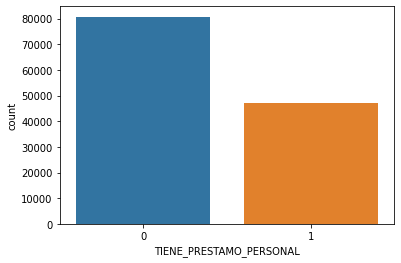

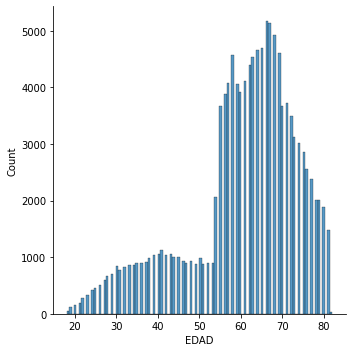

In [82]:
sns.countplot(data=df_drop, x='TIENE_PRESTAMO_PERSONAL')
plt.show()
sns.displot(data=df_drop, x='EDAD', kind='hist')
plt.show()

Hay aproximadamente el doble de clientes que no tienen un prestamo personal con respecto a quienes si lo tienen. Además, se observa que la distribución de las edades de los clientes del banco es mucho mayor a partir de los 55 años.

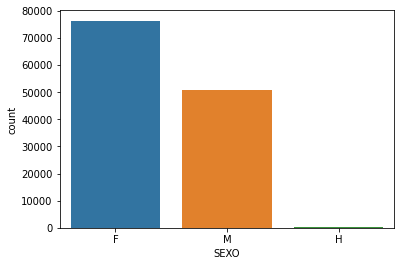

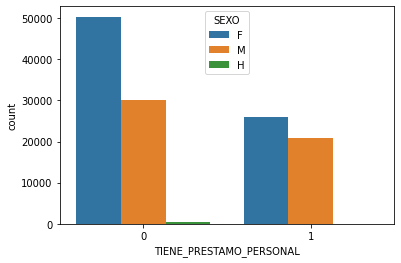

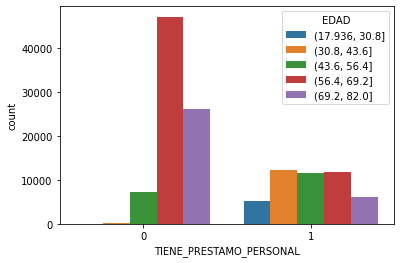

In [83]:
sns.countplot(data=df_drop, x='SEXO')
plt.show()
sns.countplot(data=df_drop, x='TIENE_PRESTAMO_PERSONAL', hue='SEXO')
plt.show()
sns.countplot(data=df_drop, x='TIENE_PRESTAMO_PERSONAL', hue=pd.cut(df_drop['EDAD'], bins=5))
plt.show()

Se observa que, si bien hay mayor cantidad considerables de clientes mujeres en el banco, a la hora de tener un préstamo a su nombre la diferencia con respecto a la cantidad de hombres que lo tienen es mucho menor.
También se puede ver que entre las personas que tienen un préstamo, la distribución de las edades en ese campo es aproximadamente "normal".

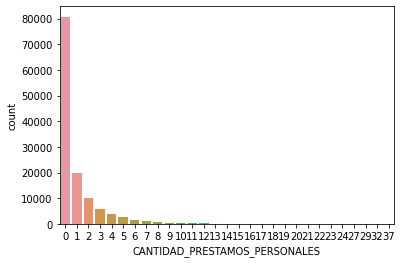

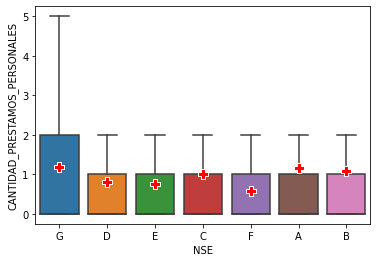

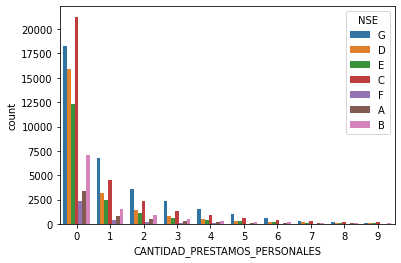

In [84]:
sns.countplot(data=df, x='CANTIDAD_PRESTAMOS_PERSONALES')
plt.show()

sns.boxplot(data=df, x='NSE', y='CANTIDAD_PRESTAMOS_PERSONALES', showmeans=True, meanprops={"marker":"P","markeredgecolor":[1,1,1,1], "markersize":"10", "markerfacecolor":'r'}, showfliers = False)
plt.show()

sns.countplot(data=df[df['CANTIDAD_PRESTAMOS_PERSONALES']<10], x='CANTIDAD_PRESTAMOS_PERSONALES', hue='NSE')
plt.show()

Como vimos anteriormente, hay mucha mayor cantidad de gente que no tiene préstamos con respecto a la que si lo tiene, y en esa categoría, la cantidad de prestamos por persona es monótonamente decreciente con valor máximo (relevante) en 10. Además, si observarmos el Nivel Socioeconómico de las personas que tienen un préstamos, notamos que las personas del nivel más bajo son aquellas que, en promedio, mayor cantidad de préstamos personales poseen. 

## Nos enfocamos ahora en observar la relación entre nuestra variable objetico (TARGET) y el resto de ellas.

Pasamos todas las varibles categóricas identificadas con etiquetas de tipo 'string' a variables enteras. 

*Nota: Este proceso estará mejor explicado en la sección DATA CLEANING AND PRE-PROSESSING*

In [88]:
df = df_drop
df['SEXO'] = df['SEXO'].replace(['M', 'H', 'F'  ], [0, 1, 2]).astype('Int64')
df['UTILIZACION_TC'] = df['UTILIZACION_TC'].replace(['bajo', 'medio', 'alto'], [0, 1, 2]).astype('Int64')
df['UTILIZACION_TD'] = df['UTILIZACION_TD'].replace(['bajo', 'medio', 'alto'], [0, 1, 2]).astype('Int64')
df['CLASIFICACION_VALOR_MAC'] = df['CLASIFICACION_VALOR_MAC'].replace(['muy bajo', 'bajo', 'medio', 'alto', 'muy alto'], [0, 1, 2, 3, 4]).astype('Int64')
df['NSE'] = (df['NSE'].replace(['G', 'F', 'E', 'D', 'C', 'B', 'A'], [0, 1, 2, 3, 4, 5, 6])).astype(float).astype('Int64')
df['SEGMENTO360'] = df['SEGMENTO360'].replace(['Clientes Otros', 'Clientes Ctas Soc/Especiales', 'Clientes Cuenta Sueldo'], [0, 1, 2]).astype('Int64')
df['Canal_Comercializacion'] = df['Canal_Comercializacion'].replace([np.nan, 'Digital', 'Sucursal', 'ATM', 'ComercioAliado'], [-1, 0, 1, 2, 3])
#Creamos categoría other para categorías con frecuencias menores a 1000 en la columna 'CLASIFICACIONCLIENTE'
other = df['CLASIFICACIONCLIENTE'].value_counts() [df['CLASIFICACIONCLIENTE'].value_counts()  < 1000]
df['CLASIFICACIONCLIENTE'] = np.where(df['CLASIFICACIONCLIENTE'].isin(other.index.to_list()), 'Other', df['CLASIFICACIONCLIENTE'])
df['SUCURSAL_ACREDITACION'] = df['SUCURSAL_ACREDITACION'].astype(int)

labels_clas_cli, i = df['CLASIFICACIONCLIENTE'].unique(), 0
for label in labels_clas_cli:
    df['CLASIFICACIONCLIENTE'], i = df['CLASIFICACIONCLIENTE'].replace(label, i), i + 1


Hacemos un mapa de calor, de los valores de correlación entre las columnas relacionadas a la información personal que tiene el banco de los clientes. 

Elegimos el coeficiente de correlación de Spearman; pues son variables categóricas, y  nos interesa saber si las variables crecen juntas, más que si la relación es lineal. 


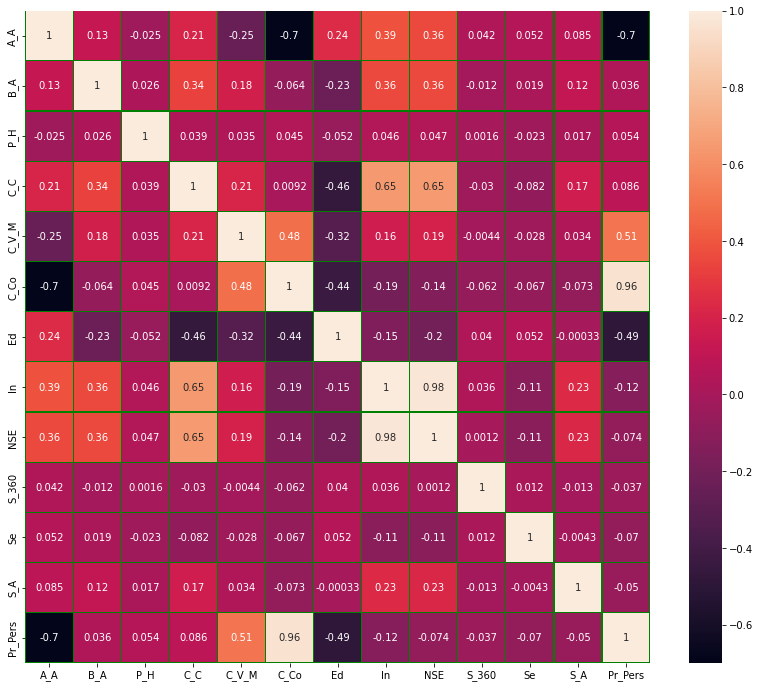

In [93]:
df_caract = df[['ANIOS_ANTIGUEDAD', 'BANCON_ACTIVO1', 
                     'CANTIDAD_PRESTAMOS_HIPOTECARIOS', 'CLASIFICACIONCLIENTE', 
                     'CLASIFICACION_VALOR_MAC', 'Canal_Comercializacion', 'EDAD', 
                     'INGRESO', 'NSE', 'SEGMENTO360', 'SEXO', 'SUCURSAL_ACREDITACION', 
                     'TIENE_PRESTAMO_PERSONAL']]
axis_labels = ['A_A', 'B_A', 'P_H', 'C_C', 'C_V_M', 'C_Co', 'Ed', 'In', 'NSE', 'S_360', 'Se', 'S_A', 'Pr_Pers']

plt.figure(figsize=(14,12))
sns.heatmap(df_caract.corr(method='spearman'), annot=True, xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.2,linecolor='green')
plt.show()

Se evidencia que nuestro TARGET está profundamente correlacionado positivamente con la variable 'Canal de Comercialización' y en menor medida con la variables: 'CLASIFICACION_VALOR_MAC' (Valor economico del cliente para BANCOR). Por otro lado, se ovserva que hay una clara correlación negativa con las variables: 'AÑOS DE ANTIGÜEDAD' y 'EDAD'. 

Ahora bien, concentrandonos en estas 4 variables, observamos que la correlación entre ellas observamos que la **menor** correlación se da entre 'AÑOS DE ANTIGÜEDAD', 'EDAD' y 'CLASIFICACION_VALOR_MAC'.

Siguiendo con el razonamiento, hacemos un mapa de calor de los valores de correlación entre las columnas relacionadas a qué productos del banco tienen los clientes. 

En líneas generales se puede ver que la correlación de nuestro TARGET con este tipo de variables es muy bajo, siendo muy cercano a cero en la mayoría de los casos. El máximo de correlación encontrada es con la variable: 'CANTIDAD DE PRODUCTOS', y también es evidente que esta variable está correlacionada con  el resto. El segundo valor máximo (aunque bastante bajo) de correlación con nuestro TARGET se da con la variable 'Tiene Seguro de Vida'.

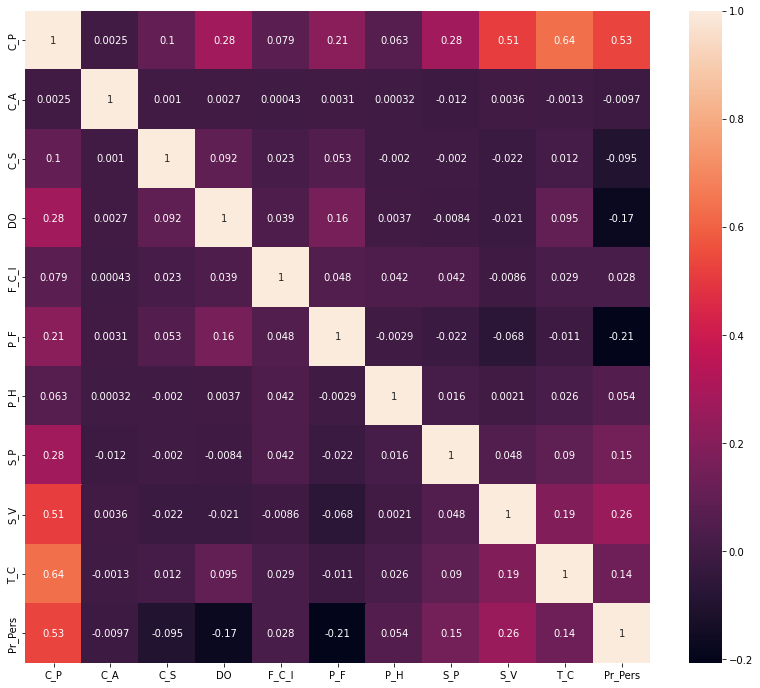

In [94]:
df_prod = df[['CANTIDAD_PRODUCTOS', 'TIENE_CAJA_AHORRO', 'TIENE_CAJA_SEGURIDAD', 'TIENE_DOLARES', 
                   'TIENE_FONDO_COMUN_INVERSION', 'TIENE_PLAZO_FIJO', 
                   'TIENE_PRESTAMO_HIPOTECARIO', 'TIENE_SEGURO_PATRIMONIAL', 
                   'TIENE_SEGURO_VIDA', 'TIENE_TARJETA_CREDITO', 'TIENE_PRESTAMO_PERSONAL']] 
axis_labels = ['C_P', 'C_A', 'C_S', 'DO', 'F_C_I', 'P_F', 'P_H', 'S_P', 'S_V', 'T_C', 'Pr_Pers']

plt.figure(figsize=(14,12))
sns.heatmap(df_prod.corr(method='spearman'), annot=True, xticklabels=axis_labels, yticklabels=axis_labels, linecolor='green')
plt.show()

Finalmente hacemos un mapa de calor de los valores de correlación entre las columnas relacionadas a la utilización de los productos del banco por parte de los clientes. 

En líneas generales se puede ver que la correlación de nuestro TARGET con este tipo de variables también es bajo, siendo muy cercano a cero en la mayoría de los casos. El máximo de correlación encontrada es con la variable: 'UTILIZACIÓN DE TARJETA DE CRÉDITO', y luego (aunque bastante bajo) con la variable 'USA_CUENTA_ADELANTO'.

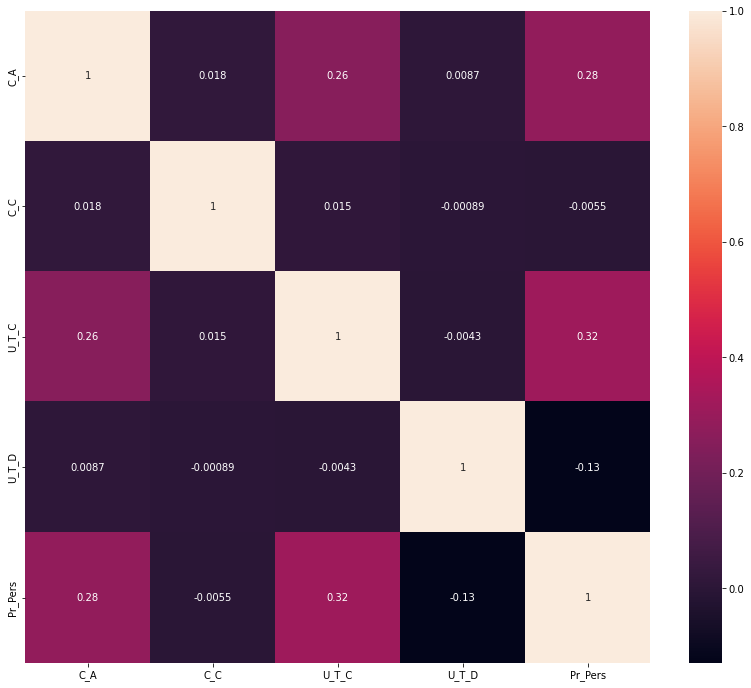

In [96]:
df_uso_prod = df[['USA_CUENTA_ADELANTO', 'USA_CUENTA_CORRIENTE', 'UTILIZACION_TC', 'UTILIZACION_TD',  'TIENE_PRESTAMO_PERSONAL']] 
axis_labels = ['C_A', 'C_C', 'U_T_C', 'U_T_D', 'Pr_Pers']

plt.figure(figsize=(14,12))
sns.heatmap(df_uso_prod.corr(method='spearman'), annot=True, xticklabels=axis_labels, yticklabels=axis_labels, linecolor='green')
plt.show()